<a href="https://colab.research.google.com/github/D4ve39/pythonProg/blob/master/MachineLearningDeepDive_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contents

1. [Classification](#class)
2. [Regression](#regr)

# Classification: Who survived the sinking of the Titanic? <a class="anchor" id="class"></a>

Can we predict who survived the sinking of the Titanic based on:
* Passenger class
* Gender
* Age
* Relatives aboard
* Fare price

# Decision Tree & Forests:
Can we at the same time introduce one of the most used non-neural-network models of machine learning? 

#### 1. Data loading 
Read the data, check how much data there is and if the format is understandable.

In [ ]:
url = "https://gitlab.com/analytics-club/ml-workshop/ml-workshop/-/raw/master/data/titanic.csv?inline=false"
df = pd.read_csv(url)
print("Number of (rows, cols):", df.shape)
df.head()


Number of (rows, cols): (887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### 2. Data Preprocessing

Let's transform the gender to numbers and remove the names.

In [ ]:
# Map "male" to 0 and "female" to 1
mapping = {'male': 0, 'female': 1}
df = df.replace({'Sex': mapping})

# Remove the name column (carries no important information)
df = df.drop('Name', axis=1)

df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


#### 3. Train/ Test split

Even though many practitioners do not act accordingly to avoid "information leakage"(will talk about it later) and make the test set performance a really good estimator of later performance, one should do the train/test split even before visualizing the data

In [ ]:
# Because I want to continue working with the nice dataframes with the named headers etc. I use a different way of selecting train test sets
train_index, test_index =train_test_split(range(len(df)),test_size=0.2,random_state=42)
df_train=df.iloc[train_index]
df_test=df.iloc[test_index]

#### 4. Data Visualization

In many real life datasets one can not plot all pairwise relations if there are many features. One should look at some of the features that might be important for the task according to "domain/expert" knowledge.

We can suppose that the age of passengers and the price they paid might have an impact on the survival chances. Let us take a look.

Text(0, 0.5, 'Fare')

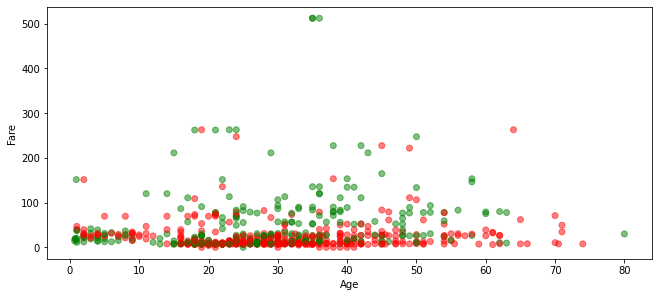

In [ ]:
colors={0:"red",1:"green"} 
fig=plt.figure(figsize=(12,5))
ax=fig.add_axes([0.2,0.2,0.7,0.7])
ax.scatter(df_train["Age"],df_train["Fare"],c=df_train['Survived'].apply(lambda x: colors[x]),alpha=0.5)
ax.set_xlabel("Age")
ax.set_ylabel("Fare")


**Description of the plot**
- The red dots are individuals that died on the Titanic.
- The green dots are individuals that survived.
- On the x-axis one has the age of the participants, on the y-axis the ticket price they paid.



**What can we learn from the plot?** 
1. Can the methods we learned last week lead to a good result?
2. What is a good rule to predict the chance of survival ? 
3. Describe with your one words at which age, with which ticket prices did the  people die/survive. How many "rules/sentences" do yo think you need?


### Decisiom Trees
Introducing a new method for data classification. Follows the intuition of finding axes alinged borders to split the data in groups that:
- have a minimal "impurity" within each group (regions of the plot where there are only red/ green dots)
- have a maximal difference between groups (one should not split a group that mostly contains green points)

This procedure is done recursively. One needs to specify how "deep" it should go, that is how many splits should be made. 

**Disclaimer**:

The next block of code is just for visualization purposes. It is neither an example of good code nor in any way polished. It is not necessary to understand what it does.

In [ ]:
from sklearn import tree
import graphviz 

def max_depth_effect(max_depth):
  # Parameters
  n_classes = 2
  plot_colors = "ryb"
  plot_step = 1

  # Load data
  pairidx=0
  pair = ["Age","Fare"]
  # We only take the two corresponding features
  X = df_train[pair].values
  y = df_train["Survived"].values
  model = tree.DecisionTreeClassifier(max_depth=max_depth)
  model.fit(X, y)

      # Plot the decision boundary
  fig,ax=plt.subplots(ncols=2,figsize=(20,5))
  tree.plot_tree(model,
                 feature_names=pair,
                 class_names=["Died","Survived"],
                 filled=True,
                 proportion=True,
                 ax=ax[0])
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  ax[1].set_xlabel(pair[0])
  ax[1].set_ylabel(pair[1])

  # Plot the training points
  for i, color in zip(range(n_classes), plot_colors):
      idx = np.where(y == i)
      ax[1].scatter(X[idx, 0], X[idx, 1], c=color, label=["Died","Survived"][i],
                  cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

  plt.suptitle("Decision surface of a decision tree using depth of {}".format(max_depth))
  plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  plt.axis("tight")

  plt.figure()



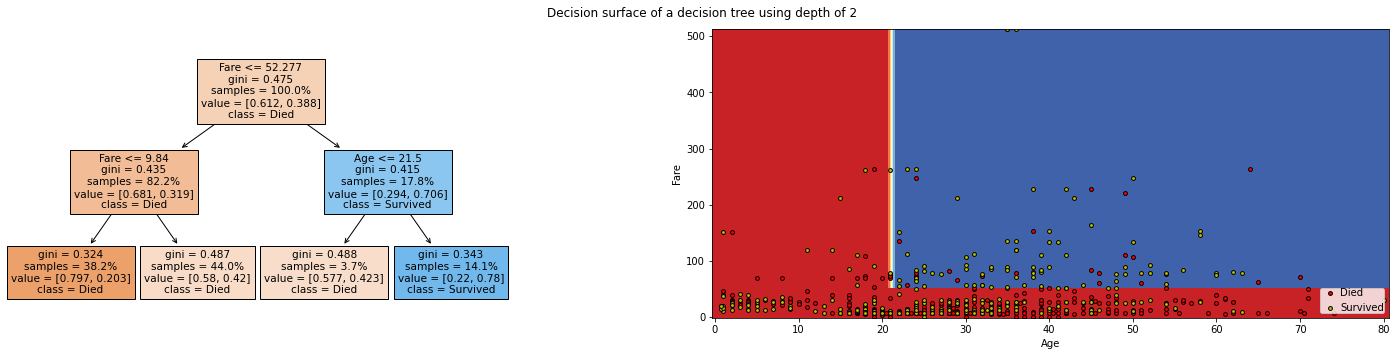

<Figure size 432x288 with 0 Axes>

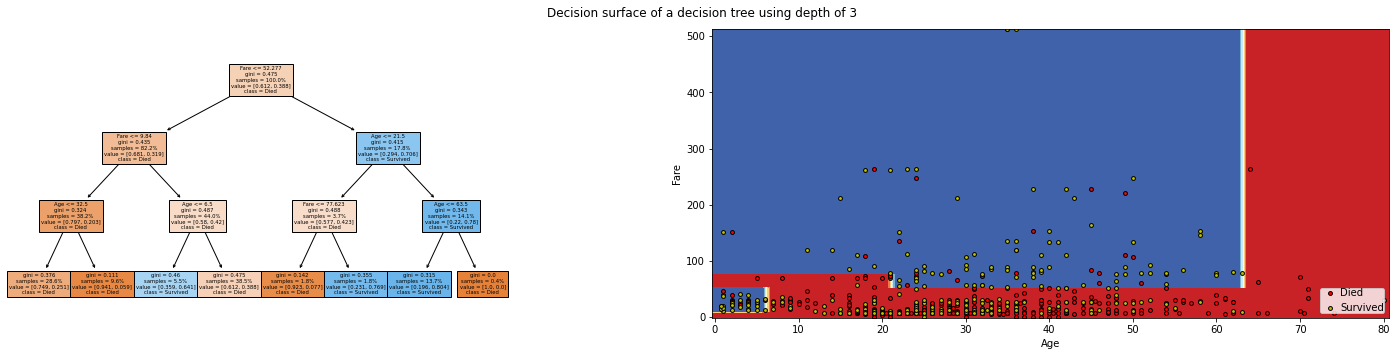

<Figure size 432x288 with 0 Axes>

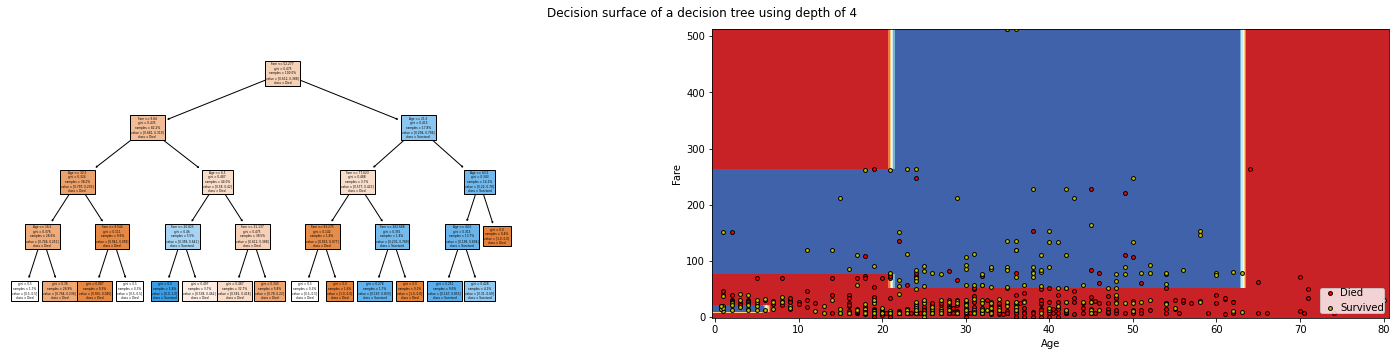

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(2,5):
  max_depth_effect(max_depth=i)

1. Rule: Old people that paid a lot for their tickets survive. 
2. Rule: Old people that paid a lot for their tickets and also most young people (even if they did not pay much) survived.
3. ... 

### Random Forests:
Machine Learning discovers the "Wisdom of the Crowds" and creates ensembles to get a better "generalization", meaning perform better on unseen examples. 

![](https://drive.google.com/uc?export=view&id=1VJxtmFPRrcdmrBFdlEId_I2osoKDd280)

Let us have a small test: How many people are in the picture? Answer quickly in the chat!

In [ ]:
votes_of_everyone=np.array([])

In [ ]:
true_value= ...

In [ ]:
print("The wise crowd missed the correct number by: ", np.abs(np.mean(votes_of_everyone)-true_value))
print("On average each individual vote was off by: ", np.mean(np.abs(votes_of_everyone-true_value)))

#### Human Wisdom of Crowds -> Machine Learning Ensemble
`TODO`: Why does wisdom of the crowd work in humans?


In Neural networks one has to create "diversity". This can be done through:
1. Diversity in the training samples (creating different subsets of the data)
2. Diversity in the available features (creating different sets of information)
3. If each model is better than random (knows something) and the set of models is diverse-> the ensemble is better than the individual model
![](https://drive.google.com/uc?export=view&id=1MOz_eMsry8MhbcsxpgJF_hfIB0LrLAGb)


#### Does the theory also show in practice ? 
Comparing one Decision tree with a forest of trees with the same hyperparameter configuration. 
Check sklearn's website for more information on the syntax and how to use the RandomForestClassifier.

In [ ]:
X_train=df_train.drop("Survived",axis=1)
y_train=df_train["Survived"]
X_test=df_test.drop("Survived",axis=1)
y_test=df_test["Survived"]

In [ ]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train,y_train)  # Random Forest object goes here
y_pred_rf = rf.predict(X_test)  # predicted values for X_test go here

In [ ]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)  # Decision Tree object goes here
y_pred_dt = dt.predict(X_test) 

#### Evalute the score

Print the accuracy score.

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.8146067415730337

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.797752808988764

#### Explainability
Usually, humans do not want to rely on a machine that has "learned" by "itself" but fails to explain its decisions. Even though Random forets are not as easy interpretable as decision trees. They can return feature importance. It is computed based on:
- How great a reduction in impurity is when one splits along this criterion.
- How often the model selects this feature for splitting. 

In [ ]:
# Get the feature names and the importance scores (the higher the more important)
features = df.columns
importances = rf.feature_importances_

# importances[sorted_indices] will be sorted
sorted_indices = np.argsort(importances)  # sorted from ascending
sorted_indices = np.flip(sorted_indices)  # now descending

print("Features : Importance")
print("--")
for index in sorted_indices:
    print("{} : {:.2f}".format(features[index], importances[index]))

Features : Importance
--
Pclass : 0.34
Parents/Children Aboard : 0.24
Sex : 0.22
Survived : 0.11
Age : 0.05
Siblings/Spouses Aboard : 0.04


### `TODO`: Regression for housing prices
The same procedure can be applied to regression tasks. This time its your task! 

#### 1. Load the data and have a look. 
This dataset contains the median housing price in the suburbs of Boston in $1000 as well as the average room number per house in this suburb and the percentage of lower status population.

We want to predict the housing price (`medv`), given the other two features (`rm` and `stat`).


The data is located in https://gitlab.com/analytics-club/ml-workshop/ml-workshop/-/raw/master/data/boston.csv, make use of pandas' read_csv function.

In [ ]:
# TODO: Load the data
url = "https://gitlab.com/analytics-club/ml-workshop/ml-workshop/-/raw/master/data/boston.csv?inline=false"
df = None

df.head()

AttributeError: ignored

#### 2. Perform the train test split
I would suggest following the same way as in clustering maintaining the dataframe structure.

Then also split the data in features X_train(X_test) and labels y_train(y_test).

In [ ]:
#TODO: train test split

#TODO: features and labels
X_train= ...
y_train= ...
X_test = ...
y_test = ... 

#### 3. Visualize the data
**Question**
 
Is the dependence linear? Can we use linear regression or does random forest make more sense?

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,6))
fig.suptitle("Housing prices")
ax1.scatter(X_train['rm'], y_train, s=70, alpha=0.4)
ax1.set_xlabel("Average number of rooms")
ax1.set_ylabel("Median housing price in $1000")

ax2.scatter(X_train['stat'], y_train, s=70, color="orange", alpha=0.4)
ax2.set_xlabel("% lower status population")


**Question**

Is it suitable for the decision tree? (a forest of decision trees)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_train['stat'], X_train['rm'], c=y_train, s=100, alpha=0.7)  # plot the price as colour of the dots (c=y)
cbar = plt.colorbar()  # add the colourbar
cbar.set_label("Housing price in $1000")  # add a label to the colourbar
plt.xlabel("% lower status population")
plt.ylabel("Average number of rooms")
plt.title("Housing price in Boston")

#### 4. Fit the models
First attempt: linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = None
y_pred_linreg = None

**WARNING: Formula ahead**

The error can be estimated as the square root of the mean squared error, where $y_i$ is the correct value and $\hat y_i$ the prediction: 
$$\epsilon = \sqrt{\text{MSE}} = \left(\frac{1}{|\text{testset}|} \sum_{i \in \text{testset}} (\hat y_i - y_i)^2\right)^\frac{1}{2}$$

Second attempt: Random Forest

Now use the `RandomForestRegressor`. Again start with 10 trees.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = None
y_pred_rf = None

#### 5. Evaluate the models


In [ ]:
mse = np.mean((y_pred_linreg - y_test)**2) 
print("Estimated error:", np.sqrt(mse))

In [ ]:
mse = np.mean((y_pred_rf - y_test)**2) 
print("Estimated error:", np.sqrt(mse))

### Which one was better? Why?